In [14]:
import pandas as pd
import seaborn as sb

In [29]:
# load and combine data files:
files = [
    "preis-benzin.csv",
    "preis-diesel.csv",
    "verbrauch-verbrenner.csv"
]

merge_label = "Jahr"

df = None
for f in files:
    if df is None:
        df = pd.read_csv(f)
    else:
        df_temp = pd.read_csv(f)
        df_temp[merge_label] = pd.to_numeric(df_temp[merge_label])
        df = df.merge(df_temp, on=merge_label)

df.head()

,Jahr,B-Preis,D-Preis,Diesel,Benzin
0,2011,155.4,141.9,6.7,7.9
1,2012,164.6,148.9,6.7,7.8
2,2013,159.2,142.8,6.8,7.8
3,2014,152.8,135.0,6.8,7.8
4,2015,139.4,117.1,6.8,7.7


[Text(0.5, 1.0, 'Durchschnittsverbrauch l/100km')]

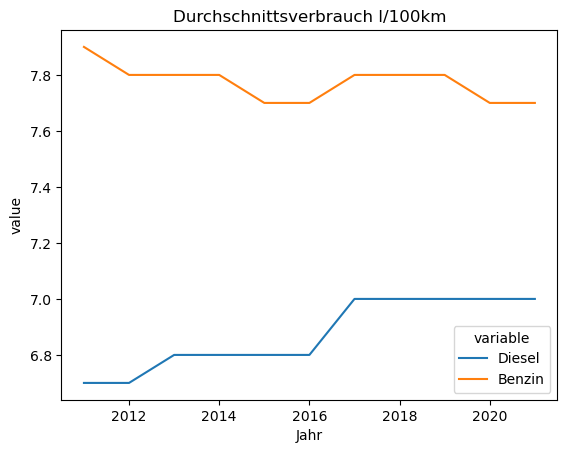

In [30]:
# small plot showing not combined data:
df_temp = pd.melt(df, id_vars=["Jahr"], value_vars=["Diesel", "Benzin"])
sb.lineplot(data=df_temp, x="Jahr", y="value", hue="variable")\
    .set(title="Durchschnittsverbrauch l/100km")

[Text(0.5, 1.0, 'Durchschnittspreis l in Cent')]

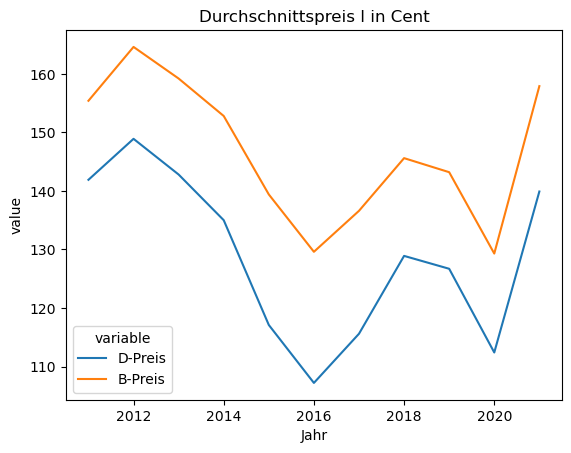

In [31]:
# small plot showing not combined data:

df_temp = pd.melt(df, id_vars=["Jahr"], value_vars=["D-Preis", "B-Preis"])
sb.lineplot(data=df_temp, x="Jahr", y="value", hue="variable") \
    .set(title="Durchschnittspreis l in Cent")

In [32]:
# create combined column:
df["CombinedDiesel"] = df["D-Preis"] * df["Diesel"]
df["CombinedBenzin"] = df["B-Preis"] * df["Benzin"]

df.head()

,Jahr,B-Preis,D-Preis,Diesel,Benzin,CombinedDiesel,CombinedBenzin
0,2011,155.4,141.9,6.7,7.9,950.73,1227.66
1,2012,164.6,148.9,6.7,7.8,997.63,1283.88
2,2013,159.2,142.8,6.8,7.8,971.04,1241.76
3,2014,152.8,135.0,6.8,7.8,918.00,1191.84
4,2015,139.4,117.1,6.8,7.7,796.28,1073.38


In [33]:
#prepare for plot (convert into long-type)
df = pd.melt(df, id_vars=["Jahr"], value_vars=["CombinedDiesel", "CombinedBenzin"])
df.head()

,Jahr,variable,value
0,2011,CombinedDiesel,950.73
1,2012,CombinedDiesel,997.63
2,2013,CombinedDiesel,971.04
3,2014,CombinedDiesel,918.00
4,2015,CombinedDiesel,796.28


<Axes: xlabel='Jahr', ylabel='value'>

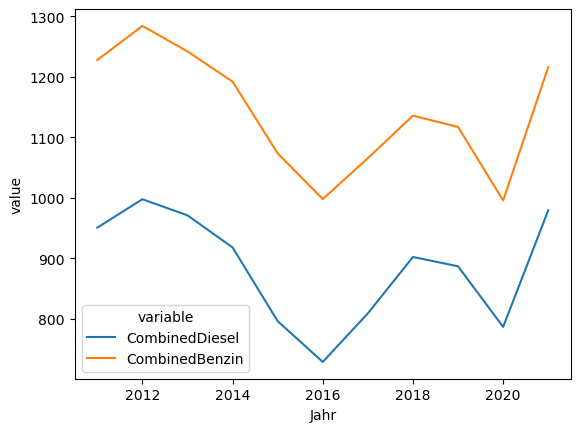

In [34]:
sb.lineplot(data=df, x="Jahr", y="value", hue="variable")
